# Survivor Exploratory Data Analysis on Contestant Age

**Purpose:** This project will explore how someone's age impacts their likelihood of winning the TV show Survivor.

*Tools & Software utilized:*
- Python with JupyterLab (data cleaning, transformation, manipulation & visualization)
- Excel (data visualization and dashboard creation)
- Tableau (data visualization and dashboard creation)

*Framework leveraged to complete project:*
  1. Ask and Identify Business Questions
  2. Collect and Store Date
  3. Clean, Analyze and Visualize in Python
  4. Visualize in Excel
  5. Visualize in Tableau

For business inquiries or collaboration requests, you can reach me at: peige77@gmail.com

## 1. Ask and Identify Business Questions

*The following questions will be answered:*
- What is the mean age of a Survivor canidate?
- What is the mean age of a Survivor winner?
- What percent of contestants in various age categories make it to the merge?
- What percent of players in various age categories win Survivor?
- Does age have an impact on a contestants ability to win Survivor?

## 2. Collect and Store Data

Data was sourced from a Kaggle data set that provides statistics on Survivor contestants: [Survivor Data](https://www.kaggle.com/datasets/justinveiner/survivor-cbs-dataset?select=contestant_table.csv)

Data was stored in an integrated development environment (JupyterLab) where the majority of our analysis will be performed.

In [50]:
#Install relevant libraries for this project
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [51]:
#Import libraries and assign aliases for convenience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#Import our data using the read_csv function in pandas
contestant_table = pd.read_csv('C:\\Users\\PM\\Desktop\\Data Analytics Projects\\Survivor Project\\contestant_table.csv')

## 3. Clean, Analyze and Visualize in Python

*In this section we will follow the basic steps of:*
- Discovering our data
- Joining our data
- Validating our data
- Structuring our data
- Cleaning our data
- Then Validating one final time

In [53]:
#Checking to ensure contestant_table is correctly imported with head function and identifying our column names
contestant_table.head(1)

,contestant_name,age,hometown,profession,num_season,finish,gender,african_american,asian_american,latin_american,...,num_boot,tribe1,tribe2,tribe3,quit,evac,ejected,fmc,num_jury_votes,normalized_finish
0,Sonja Christopher,63,"Walnut Creek, CA",Musician/Retired Teacher,1,16,F,0,0,0,...,1,Tagi,NaN,NaN,0,0,0,0,NaN,0.0


In [54]:
# Determining what columns are present in the data and which will be useful for this analysis
for column in contestant_table:
    print(column)

contestant_name
age
hometown
profession
num_season
finish
gender
african_american
asian_american
latin_american
poc
jewish
muslim
lgbt
state
country
num_appearance
birthdate
merge
jury
ftc
votes_against
num_boot
tribe1
tribe2
tribe3
quit
evac
ejected
fmc
num_jury_votes
normalized_finish


In [55]:
#Confirming the shape of each table
print('Shape of contestant_table:')
contestant_table.shape

Shape of contestant_table:


(785, 32)

In [56]:
# Info() function used to reveal more information about our data
contestant_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   contestant_name    785 non-null    object 
 1   age                785 non-null    int64  
 2   hometown           785 non-null    object 
 3   profession         785 non-null    object 
 4   num_season         785 non-null    int64  
 5   finish             785 non-null    int64  
 6   gender             785 non-null    object 
 7   african_american   785 non-null    int64  
 8   asian_american     785 non-null    int64  
 9   latin_american     785 non-null    int64  
 10  poc                785 non-null    int64  
 11  jewish             785 non-null    int64  
 12  muslim             785 non-null    int64  
 13  lgbt               785 non-null    int64  
 14  state              785 non-null    object 
 15  country            785 non-null    object 
 16  num_appearance     785 non

In [57]:
# describe() function used to identify basic statistics and distributions of our dataframe
contestant_table.describe()

,age,num_season,finish,african_american,asian_american,latin_american,poc,jewish,muslim,lgbt,...,jury,ftc,votes_against,num_boot,quit,evac,ejected,fmc,num_jury_votes,normalized_finish
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,...,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,114.000000,785.000000
mean,33.410191,22.547771,9.682803,0.145223,0.078981,0.080255,0.294268,0.045860,0.005096,0.082803,...,0.374522,0.145223,6.006369,9.698089,0.016561,0.021656,0.001274,0.020382,3.192982,0.473011
std,10.098363,12.241952,5.381376,0.352550,0.269881,0.271860,0.456003,0.209314,0.071246,0.275759,...,0.484308,0.352550,3.331009,5.382493,0.127699,0.145651,0.035692,0.141394,2.896067,0.288981
min,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.222222
50%,31.000000,23.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.473684
75%,40.000000,33.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,8.000000,14.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.722222
max,75.000000,43.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,22.000000,20.000000,1.000000,1.000000,1.000000,1.000000,12.000000,0.950000


## Business Question: What is the mean age of a Survivor contestant?

In [58]:
# Mean age of a typical player on survivor
age = contestant_table['age'].mean()
rounded_age= round(age,1)
print(f'Age of a typical player in survivor: {rounded_age}')

Age of a typical player in survivor: 33.4


In [59]:
# Determining the standard deviation of ages of contestants
std_age = np.std(contestant_table['age'], ddof=1)
rounded_std_age = round(std_age, 1)
print(f'Standard deviation in contestant age: {rounded_std_age}')

Standard deviation in contestant age: 10.1


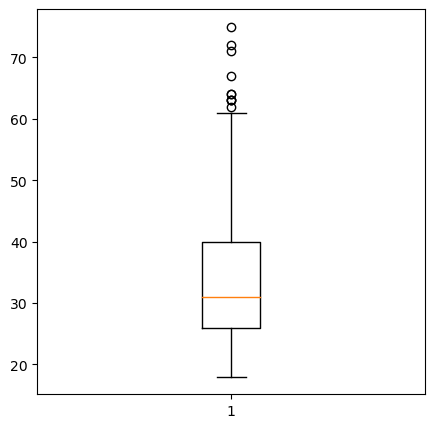

In [60]:
# Our STD seems rather high leading me to believe outliers are present
# Creating a boxplot should help us determine outliers
plt.figure(figsize=(5,5))
plt.boxplot(contestant_table['age'])
plt.show()

In [61]:
# We will create quartiles and use the interquartile range to identify and eliminate outliers
q1 = np.percentile(contestant_table['age'], 25)  
q3 = np.percentile(contestant_table['age'], 75)  
iqr = q3 - q1  # Calculate the IQR

print("Interquartile Range (IQR):", iqr)

Interquartile Range (IQR): 14.0


Mean of cleaned Data (without outliers): 32.8


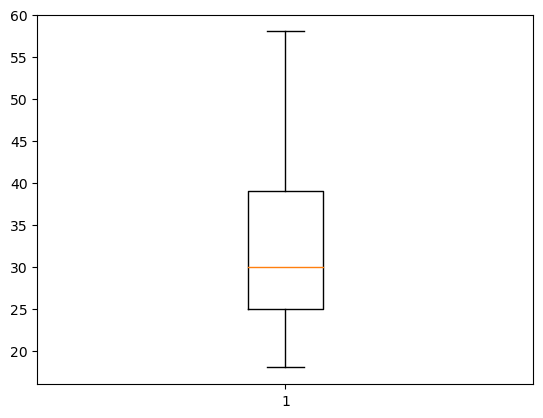

In [62]:
# We will remove value that are more that 1.3 times the IQR
# 1.3 was used instead of 1.5 due to outliers still being present in data

lower_range = q1 - 1.3 * iqr
upper_range = q3 + 1.3 * iqr

cleaned_data = []

for outlier in contestant_table['age']:
     if lower_range <= outlier <= upper_range:
        cleaned_data.append(outlier)

cleaned_mean = np.mean(cleaned_data)
round_clean = round(cleaned_mean,1)

print("Mean of cleaned Data (without outliers):", round_clean)

plt.figure
plt.boxplot(cleaned_data)
plt.show()

In [63]:
# Average STD of a contestant after removing outliers
contestant_std1= np.std(cleaned_data)
rounded_std_without_outliers= round(contestant_std1,1)
print(f'Rounded STD of a contestant (outliers removed): {rounded_std_without_outliers}')

Rounded STD of a contestant (outliers removed): 9.2


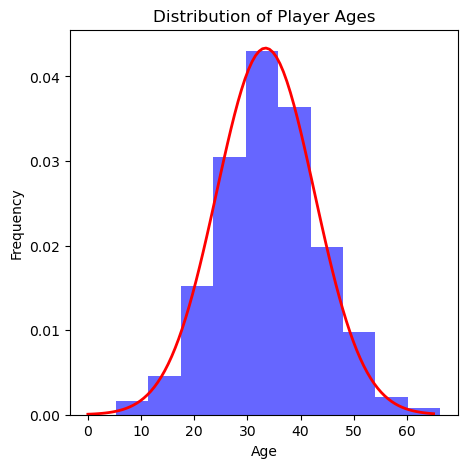

In [64]:
# Determining the distribution of contestant ages
mean = 33.4
std_dev = 9.2

data = np.random.normal(mean, std_dev, 785)
plt.figure(figsize=(5,5))
min_value = 18
max_value = 70

plt.hist(data, bins=10, density=True, alpha=0.6, color='b')

plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

x = np.linspace(0, 65, 100)
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std_dev**2))
plt.plot(x, pdf, color='r', linewidth=2)

plt.show()

## Business Question: What is the mean age of a Survivor winner?

In [65]:
# Add a new column to contestant_table to identify the seasons winner
def determine_winner(finish):
    if finish == 1:
        return 'Winner'
    else:
        return 'Loser'
        
contestant_table['winner'] = contestant_table['finish'].apply(determine_winner)

In [66]:
# Ensuring the new 'winner' column was created in the contestant_table
contestant_table.head(2)

,contestant_name,age,hometown,profession,num_season,finish,gender,african_american,asian_american,latin_american,...,tribe1,tribe2,tribe3,quit,evac,ejected,fmc,num_jury_votes,normalized_finish,winner
0,Sonja Christopher,63,"Walnut Creek, CA",Musician/Retired Teacher,1,16,F,0,0,0,...,Tagi,NaN,NaN,0,0,0,0,NaN,0.0000,Loser
1,B.B. Andersen,64,"Mission Hills, KS",Real Estate Developer,1,15,M,0,0,0,...,Pagong,NaN,NaN,0,0,0,0,NaN,0.0625,Loser


In [67]:
# Display how many winners there were over the last 43 season to ensure data accuracty
winner_count = (contestant_table['winner'] == 'Winner').sum()

# Display number of unique winner for accuracy
unique_winner_count = contestant_table[contestant_table['winner'] == 'Winner']['contestant_name'].nunique()

print("Number of winners:", winner_count)
print("Number of unique winners:", unique_winner_count)

Number of winners: 43
Number of unique winners: 41


In [68]:
# Print a list of every Survivor winner 
winner_info = contestant_table[contestant_table['winner'] == 'Winner'][['contestant_name', 'num_season']]
for index, row in winner_info.iterrows():
    name = row['contestant_name']
    num_season = row['num_season']
    print(f'{name} won season {num_season} of Survivor')

Richard Hatch won season 1 of Survivor
Tina Wesson won season 2 of Survivor
Ethan Zohn won season 3 of Survivor
Vecepia Towery won season 4 of Survivor
Brian Heidik won season 5 of Survivor
Jenna Morasca won season 6 of Survivor
Sandra Diaz-Twine won season 7 of Survivor
Amber Mariano won season 8 of Survivor
Chris Daugherty won season 9 of Survivor
Tom Westman won season 10 of Survivor
Danni Boatwright won season 11 of Survivor
Aras Baskauskas won season 12 of Survivor
Yul Kwon won season 13 of Survivor
Earl Cole won season 14 of Survivor
Todd Herzog won season 15 of Survivor
Parvati Shallow won season 16 of Survivor
Bob Crowley won season 17 of Survivor
J.T. Thomas won season 18 of Survivor
Natalie White won season 19 of Survivor
Sandra Diaz-Twine won season 20 of Survivor
Fabio Birza won season 21 of Survivor
Rob Mariano won season 22 of Survivor
Sophie Clarke won season 23 of Survivor
Kim Spradlin-Wolfe won season 24 of Survivor
Denise Stapley won season 25 of Survivor
John Cochran

In [69]:
# Print the names of the only doulbe winners in Survivor
double_winners = contestant_table[contestant_table['winner'] == 'Winner']['contestant_name'].value_counts()
for name, count in double_winners.items():
    if count > 1:
        print(name)

Tony Vlachos
Sandra Diaz-Twine


In [70]:
# Mean age of a winner in Survivor
winner_age = contestant_table[contestant_table['winner']=='Winner']['age'].mean()
rounded_winner_age = round(winner_age, 1)
print(f'Age of a typical winner: {rounded_winner_age}')

Age of a typical winner: 31.6


In [71]:
# Determining the standard deviation of ages of winners
winner_std= np.std(contestant_table[contestant_table['winner']=='Winner']['age'])
rounded_winner= round(winner_std,1)
print(f'Standard deviation in winner age: {rounded_winner}')

Standard deviation in winner age: 7.9


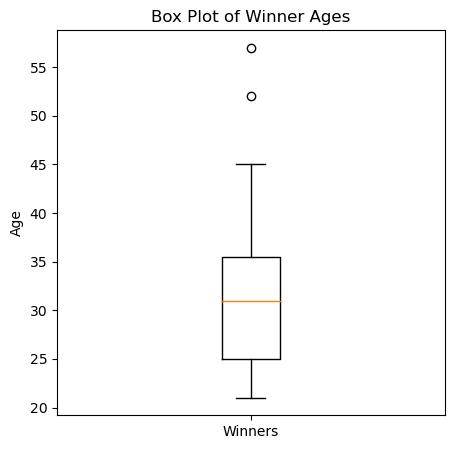

In [72]:
# Our STD seems reasonable but ill quickly create a box plot to determine possible outliers
winners_data = contestant_table[contestant_table['winner'] == 'Winner']

# Create a box plot for the 'age' column of winners
plt.figure(figsize=(5,5))
plt.boxplot(winners_data['age'], labels=['Winners'])
plt.title('Box Plot of Winner Ages')
plt.ylabel('Age')
plt.show()

In [73]:
# We will create quartiles and use the interquartile range to identify and eliminate outliers
winners_data = contestant_table[contestant_table['winner'] == 'Winner']

winner_q1 = np.percentile(winners_data['age'], 25)
winner_q3 = np.percentile(winners_data['age'], 75)

winner_iqr = winner_q3 - winner_q1

print("Interquartile Range (IQR) of Winner Ages:", winner_iqr)

Interquartile Range (IQR) of Winner Ages: 10.5


Mean of cleaned Data (without outliers): 30.5


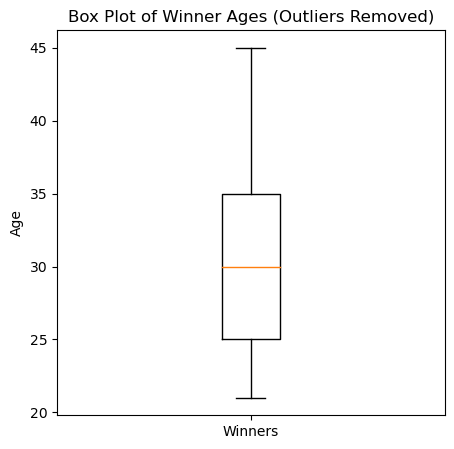

In [74]:
# We will remove value that are more that 1.3 times the IQR
# 1.3 was used instead of 1.5 due to outliers still being present in data

winner_lower_range = winner_q1 - 1.3 * winner_iqr
winner_upper_range = winner_q3 + 1.3 * winner_iqr

winner_cleaned_data = [age for age in winners_data['age'] if winner_lower_range <= age <= winner_upper_range]

winner_cleaned_mean = np.mean(winner_cleaned_data)
winner_round_clean = round(winner_cleaned_mean, 1)

print("Mean of cleaned Data (without outliers):", winner_round_clean)

plt.figure(figsize=(5,5))
plt.boxplot(winner_cleaned_data, labels=['Winners'])
plt.title('Box Plot of Winner Ages (Outliers Removed)')
plt.ylabel('Age')
plt.show()

In [75]:
# Rounded STD of winner with outliers removed
winner_std1= np.std(winner_cleaned_data)
rounded_std_winner_without_outliers= round(winner_std1,1)
print(f'Rounded STD of a winner (outliers removed): {rounded_std_winner_without_outliers}')

Rounded STD of a winner (outliers removed): 6.3


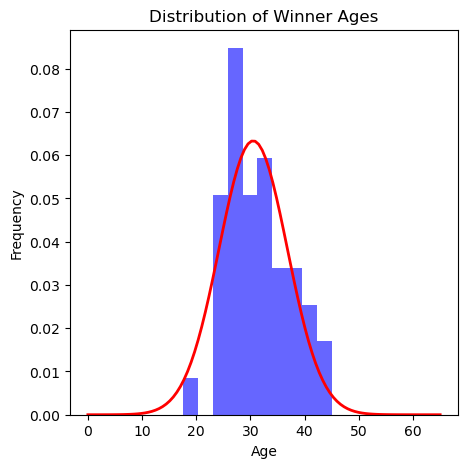

In [76]:
# Determining the distribution of winner ages
mean = 30.5
std_dev = 6.3

data = np.random.normal(mean, std_dev, 43)

min_value = 18
max_value = 70

plt.figure(figsize=(5,5))

plt.hist(data, bins=10, density=True, alpha=0.6, color='b')

plt.title('Distribution of Winner Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

x = np.linspace(0, 65, 100)
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std_dev**2))
plt.plot(x, pdf, color='r', linewidth=2)

plt.show()

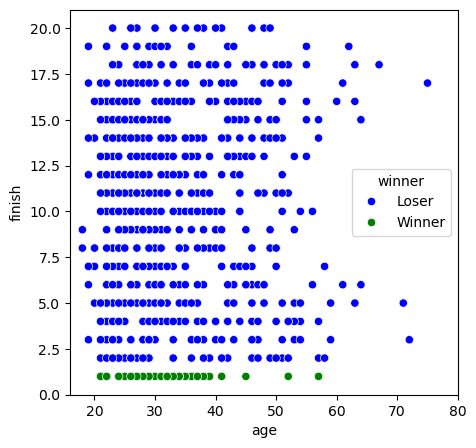

In [77]:
#Create a scatter plot showing where contestants finish based on their age

palette = {"Winner": "green", "Loser": "blue"}

plt.figure(figsize=(5, 5))  
sns.scatterplot(x='age', y='finish', data=contestant_table, hue='winner', palette=palette)

plt.xlim(16, 80)
plt.ylim(0, 21)

plt.show()

## Business Question: What percent of contestants in various age categories make it to the merge?

In [78]:
# Create a new column called age_category that sorts players into categories based on age

age_bins = [18, 28, 40, float('inf')]
age_labels = ['Young', 'Middle Age', 'Old']

contestant_table['age_category'] = pd.cut(
    contestant_table['age'],
    bins=age_bins,
    labels=age_labels,
    right=False  
)

print(contestant_table)

       contestant_name  age            hometown                   profession  \
0    Sonja Christopher   63   Walnut Creek,  CA     Musician/Retired Teacher   
1        B.B. Andersen   64  Mission Hills,  KS        Real Estate Developer   
2      Stacey Stillman   27  San Francisco,  CA                     Attorney   
3          Ramona Gray   29         Edison,  NJ                   Biochemist   
4            Dirk Been   23   Spring Green,  WI                 Dairy Farmer   
..                 ...  ...                 ...                          ...   
780   Karla Cruz Godoy   28         Newark,  DE  Educational Project Manager   
781        Jesse Lopez   30         Durham,  NC        Political Science PhD   
782        Owen Knight   29    New Orleans,  LA  College Admissions Director   
783      Cassidy Clark   26         Austin,  TX                     Designer   
784        Mike Gabler   52       Meridian,  ID       Heart Valve Specialist   

     num_season  finish gender  african

In [79]:
# Show how many contestants fall into each age category
age_count = contestant_table['age_category'].value_counts()
print(age_count)

age_category
Middle Age    306
Young         280
Old           199
Name: count, dtype: int64


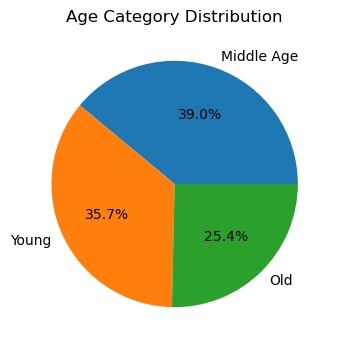

In [80]:
# Create a pie chart to illistrate the distribution of each age_category
age_category_counts = contestant_table['age_category'].value_counts()

plt.figure(figsize=(8, 4))
plt.pie(age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%')
plt.title('Age Category Distribution')
plt.show()

In [81]:
# Exploring how what type of data is used in the column 'merge' for following calculation
contestant_table['merge']

0      0
1      0
2      0
3      0
4      0
      ..
780    1
781    1
782    1
783    1
784    1
Name: merge, Length: 785, dtype: int64

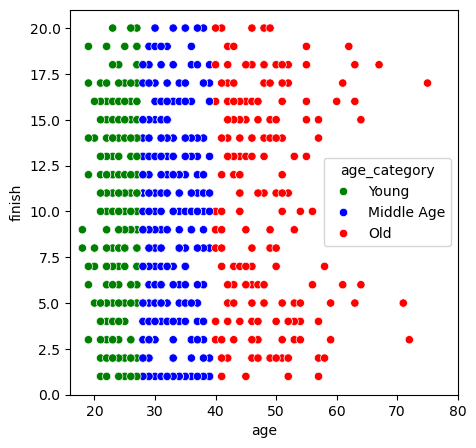

In [82]:
# Create a quick scatter plot to visulize age_category 
palette = {"Young": "green", "Middle Age": "blue", "Old": "red"}

plt.figure(figsize=(5,5))

sns.scatterplot(x='age', y='finish', data=contestant_table, hue='age_category', palette=palette)

plt.xlim(16, 80)
plt.ylim(0, 21)

plt.show()

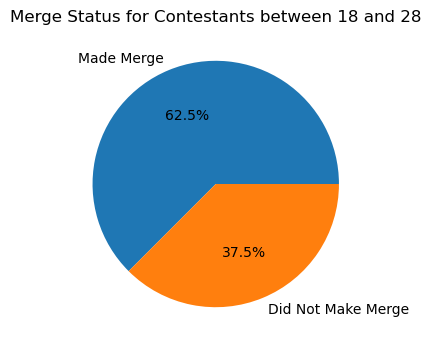

In [83]:
# Percent of "Young" players who make the merdge
age_category_merge = contestant_table[contestant_table['age_category'] == 'Young']['merge'].value_counts().rename({0: "Did Not Make Merge", 1: "Made Merge"})

plt.figure(figsize=(8, 4))
plt.pie(age_category_merge, labels=age_category_merge.index, autopct='%1.1f%%')
plt.title('Merge Status for Contestants between 18 and 28')
plt.show()

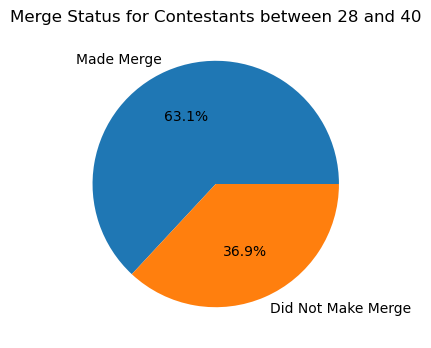

In [84]:
# Percent of "Middle Age" players who make the merdge
age_category_merge = contestant_table[contestant_table['age_category'] == 'Middle Age']['merge'].value_counts().rename({0: "Did Not Make Merge", 1: "Made Merge"})

plt.figure(figsize=(8, 4))
plt.pie(age_category_merge, labels=age_category_merge.index, autopct='%1.1f%%')
plt.title('Merge Status for Contestants between 28 and 40')
plt.show()

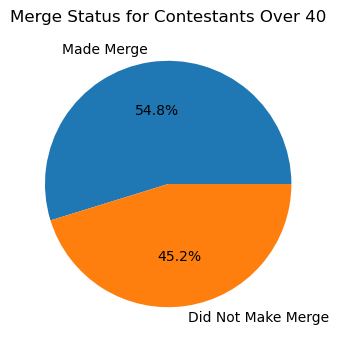

In [85]:
# Percent of "Old" players who make the merdge
age_category_merge = contestant_table[contestant_table['age_category'] == 'Old']['merge'].value_counts().rename({0: "Did Not Make Merge", 1: "Made Merge"})

plt.figure(figsize=(8, 4))
plt.pie(age_category_merge, labels=age_category_merge.index, autopct='%1.1f%%')
plt.title('Merge Status for Contestants Over 40')
plt.show()

## Business Question: What percent of contestants in various age categories make win Survivor?

In [86]:
# Creating a list of Survivor winners who were between 18 and 28 when they won
young_winner = contestant_table[(contestant_table['winner'] == 'Winner') & (contestant_table['age_category'] == 'Young')]['contestant_name'].value_counts()
print(young_winner)

contestant_name
Ethan Zohn            1
Sophie Clarke         1
Tommy Sheehan         1
Chris Underwood       1
Nick Wilson           1
Adam Klein            1
Michele Fitzgerald    1
John Cochran          1
Fabio Birza           1
Jenna Morasca         1
Natalie White         1
J.T. Thomas           1
Parvati Shallow       1
Todd Herzog           1
Aras Baskauskas       1
Amber Mariano         1
Maryanne Oketch       1
Name: count, dtype: int64


In [87]:
# Creating a list of Survivor winners who were between 28 and 40 when they won
middle_age_winner = contestant_table[(contestant_table['winner'] == 'Winner') & (contestant_table['age_category'] == 'Middle Age')]['contestant_name'].value_counts()
print(middle_age_winner)

contestant_name
Sandra Diaz-Twine     2
Richard Hatch         1
Tyson Apostol         1
Wendell Holland       1
Ben Driebergen        1
Sarah Lacina          1
Jeremy Collins        1
Mike Holloway         1
Natalie Anderson      1
Tony Vlachos          1
Kim Spradlin-Wolfe    1
Tina Wesson           1
Rob Mariano           1
Earl Cole             1
Yul Kwon              1
Danni Boatwright      1
Chris Daugherty       1
Brian Heidik          1
Vecepia Towery        1
Erika Casupanan       1
Name: count, dtype: int64


In [88]:
# Creating a list of Survivor winners who were over 40 when they won
old_winner = contestant_table[(contestant_table['winner'] == 'Winner') & (contestant_table['age_category'] == 'Old')]['contestant_name'].value_counts()
print(old_winner)

contestant_name
Tom Westman       1
Bob Crowley       1
Denise Stapley    1
Tony Vlachos      1
Mike Gabler       1
Name: count, dtype: int64


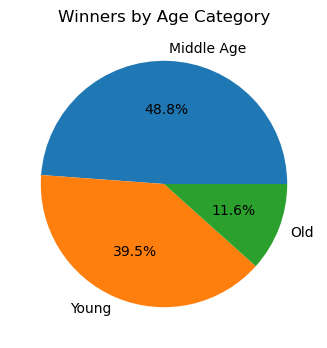

In [89]:
# Winners by age_category
age_category_counts = contestant_table[contestant_table['winner'] == 'Winner']['age_category'].value_counts()

plt.figure(figsize=(8,4))
           
plt.pie(age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%')
plt.title('Winners by Age Category')
plt.show()

## 4. Visualize in Excel

Now that we have completed the section of this project using python, we want to download the CSV and upload in into Excel for our data visulization.

In [91]:
file_path = 'C:\\Users\\PM\\Desktop\\Data Analytics Projects\\Survivor_contestant_cleaned.csv'
contestant_table.to_csv(file_path, index=False)

## 5. Visualize in Tableau